In [30]:
# import necessary libraries
import yfinance as yf
import pandas as pd
import numpy as np

##### Prepare data (method 1)

In [ ]:
#@title METHOD 1: Fetch S&P 500 Data

# Fetch SPX (S&P 500 Index) data for the last 20 years
ticker = "^GSPC"  # This is Yahoo Finance's symbol for S&P 500
start_date = "2000-01-01"
end_date = "2025-01-01"

df = yf.download(ticker, start=start_date, end=end_date, interval='1d')

# clean and reformat the data
# remove multi index
df.columns = df.columns.get_level_values(0)
# Reset index to make 'Date' a column
df = df.reset_index()

df.head()

[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
0,2000-01-03,1455.219971,1478.000000,1438.359985,1469.250000,931800000
1,2000-01-04,1399.420044,1455.219971,1397.430054,1455.219971,1009000000
2,2000-01-05,1402.109985,1413.270020,1377.680054,1399.420044,1085500000
3,2000-01-06,1403.449951,1411.900024,1392.099976,1402.109985,1092300000
4,2000-01-07,1441.469971,1441.469971,1400.729980,1403.449951,1225200000


In [ ]:
#@title METHOD 2: Read from a CSV file
# alternatively, read from a CSV file
df = pd.read_csv("../data/spx_data.csv", index_col=0)

df.head()

In [ ]:


df.head()

Price,Close,High,Low,Open,Volume
Date,,,,,
2000-01-03,1455.219971,1478.000000,1438.359985,1469.250000,931800000
2000-01-04,1399.420044,1455.219971,1397.430054,1455.219971,1009000000
2000-01-05,1402.109985,1413.270020,1377.680054,1399.420044,1085500000
2000-01-06,1403.449951,1411.900024,1392.099976,1402.109985,1092300000
2000-01-07,1441.469971,1441.469971,1400.729980,1403.449951,1225200000


In [ ]:


df.head()

Price,Date,Close,High,Low,Open,Volume
0,2000-01-03,1455.219971,1478.000000,1438.359985,1469.250000,931800000
1,2000-01-04,1399.420044,1455.219971,1397.430054,1455.219971,1009000000
2,2000-01-05,1402.109985,1413.270020,1377.680054,1399.420044,1085500000
3,2000-01-06,1403.449951,1411.900024,1392.099976,1402.109985,1092300000
4,2000-01-07,1441.469971,1441.469971,1400.729980,1403.449951,1225200000


***

In [41]:
# save the data to a CSV file
df.to_csv('../data/spx_data.csv', index=True, header=True)

,Date,Close,High,Low,Open,Volume
0,2000-01-03,1455.219971,1478.000000,1438.359985,1469.250000,931800000
1,2000-01-04,1399.420044,1455.219971,1397.430054,1455.219971,1009000000
2,2000-01-05,1402.109985,1413.270020,1377.680054,1399.420044,1085500000
3,2000-01-06,1403.449951,1411.900024,1392.099976,1402.109985,1092300000
4,2000-01-07,1441.469971,1441.469971,1400.729980,1403.449951,1225200000


In [11]:
df2.head()

,Price,Close,High,Low,Open,Volume
0,Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC
1,Date,NaN,NaN,NaN,NaN,NaN
2,2000-01-03,1455.219970703125,1478.0,1438.3599853515625,1469.25,931800000
3,2000-01-04,1399.4200439453125,1455.219970703125,1397.4300537109375,1455.219970703125,1009000000
4,2000-01-05,1402.1099853515625,1413.27001953125,1377.6800537109375,1399.4200439453125,1085500000


In [ ]:
print(df.shape)



_="""
# Drop NaNs (just in case)

"""
print(df.shape)


(6289, 5)
(6289, 6)


In [35]:
# Daily return
df['Return'] = df['Close'].pct_change()

# Log return
df['LogReturn'] = np.log(df['Close'] / df['Close'].shift(1))

df = df.dropna()


In [36]:
# print the first few rows of Return and LogReturn
print(df[['Date', 'Return', 'LogReturn']].head())

Empty DataFrame
Columns: [(Date, ), (Return, ), (LogReturn, )]
Index: []


In [ ]:


print

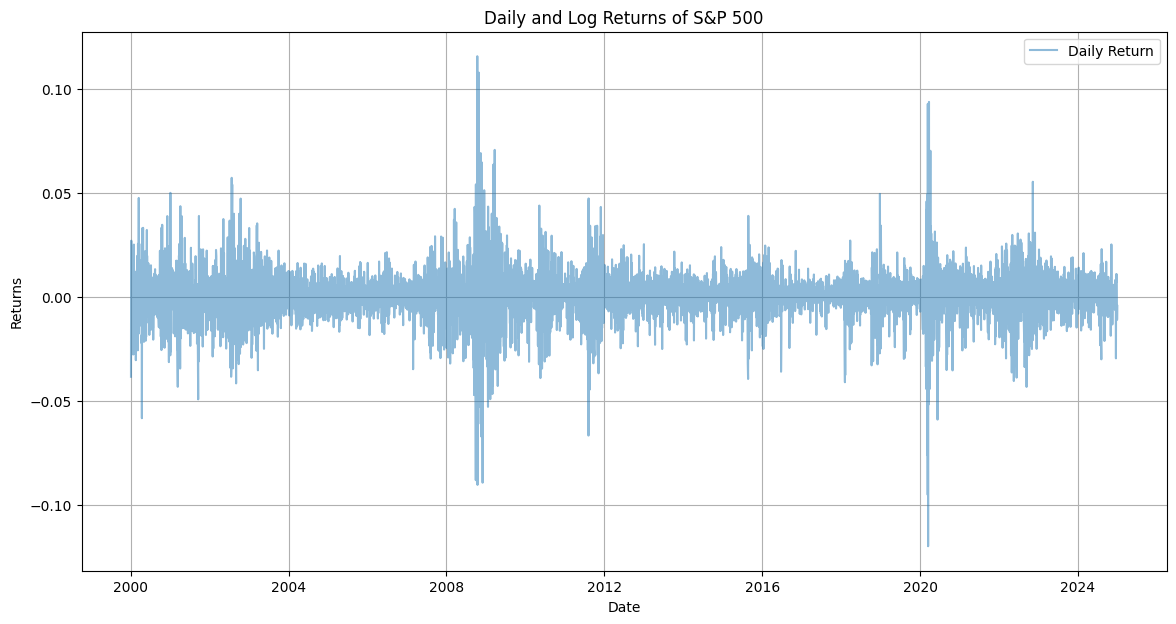

In [31]:
# plot return and log returns
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Return'], label='Daily Return', alpha=0.5)
plt.title('Daily and Log Returns of S&P 500')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.grid()
plt.show()


In [32]:
# take Returns and LogReturns and apply them to a random walk model
def random_walk(start_price, returns, log_returns):
    prices = [start_price]
    for r, lr in zip(returns, log_returns):
        next_price = prices[-1] * (1 + r)  # Using daily return
        prices.append(next_price)
    return prices

# Start price for the random walk
start_price = df['Close'].iloc[0]
# Generate random walk prices
random_walk_prices = random_walk(start_price, df['Return'].values, df['LogReturn'].values)
# Create a DataFrame for the random walk prices
random_walk_df = pd.DataFrame({
    'Date': df['Date'],
    'RandomWalkPrice': random_walk_prices
})
# Plot the random walk prices
plt.figure(figsize=(14, 7))
plt.plot(random_walk_df['Date'], random_walk_df['RandomWalkPrice'], label='Random Walk Price', color='orange')
plt.title('Random Walk Price of S&P 500')
plt.xlabel('Date')  
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

ValueError: array length 6290 does not match index length 6289